In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap

In [2]:
# import data
n_datasets = 5
data = [np.genfromtxt("dataset_classifiers"+str(i+1)+".csv", delimiter=",") for i in range(n_datasets)]
# format the tables
data[0] = data[0][1:,1:]
data[1] = data[1][1:,1:]
data[3] = data[3][1:,1:]
data[4] = data[4][1:,1:]
datasets_names = ["Blobs", "Rings", "Moons", "AND", "XOR"]

In [3]:
# make the classifiers list
classifiers = [NearestCentroid(),
               KNeighborsClassifier(n_neighbors=5),
               SVC(C=10, gamma=0.1, kernel="rbf"),
               Perceptron(l1_ratio=0.3,max_iter=5),
               MLPClassifier(hidden_layer_sizes=(2,), activation="logistic", max_iter=1000, solver="lbfgs", alpha=0.001),
               MLPClassifier(hidden_layer_sizes=(3,), activation="logistic", max_iter=1000, solver="lbfgs", alpha=0.001),
               MLPClassifier(hidden_layer_sizes=(4,), activation="logistic", max_iter=1000, solver="lbfgs", alpha=0.001)]
n_classifiers = len(classifiers)
classifiers_names = ["MDC", "k-NN", "SVC", "Perceptron", "MLP 2-2-1", "MLP 2-3-1", "MLP 2-4-1"]

c:\Users\tu_rk\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tu_rk\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tu_rk\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tu_rk\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

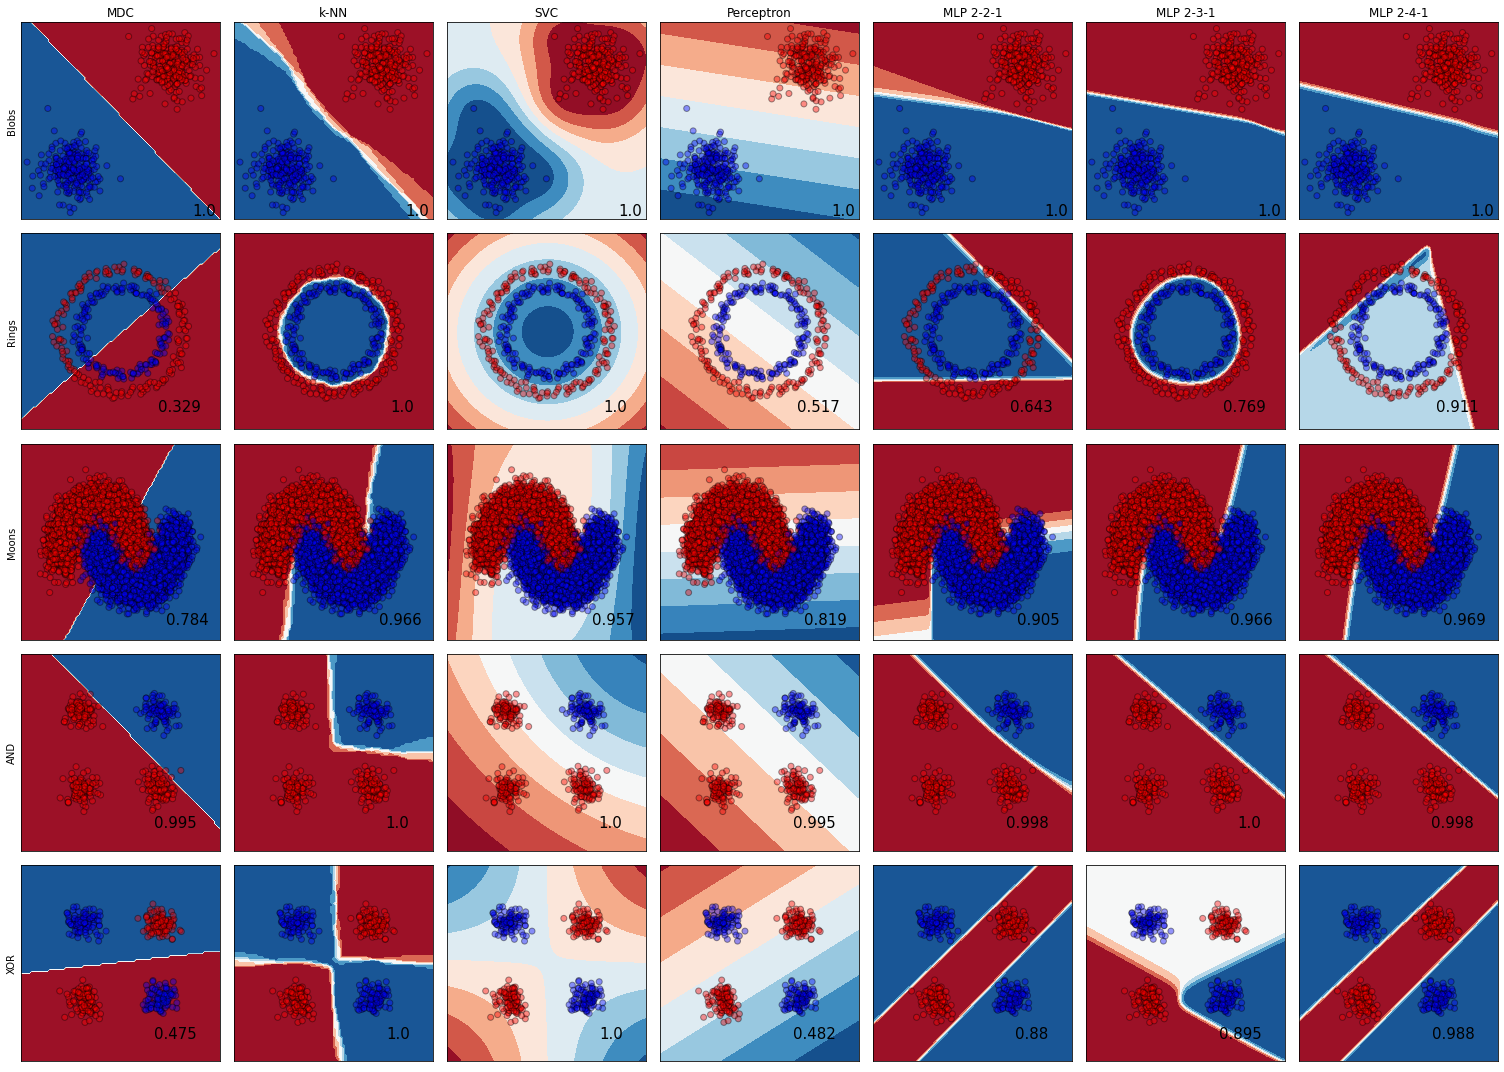

In [7]:
# set the KFold object to compute the accuracies
n_splits = 25
kf = KFold(n_splits=n_splits)
accuracy = np.zeros((n_datasets,n_classifiers))
# iteration over datasets
for i in range(n_datasets):
  X = data[i][:,:2]
  y = data[i][:,2:]
  # iteration over classifiers
  for j in range(n_classifiers):
    classifier = classifiers[j]  
    accuracy_k = np.zeros(n_splits)
    split_counter = 0
    # iteration over splits
    for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      # fiting the classifier
      classifier.fit(X_train, y_train)
      y_pred = classifier.predict(X_test)
      # computing split accuracy
      accuracy_k[split_counter] = accuracy_score(y_test, y_pred)
      split_counter += 1
    # compute the mean accuracy
    accuracy[i][j] = np.sum(accuracy_k)/n_splits

# Now we plot the clasifiers decision functions
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
figure = plt.figure(figsize=(3*n_classifiers, 3*n_datasets))
figure.patch.set_facecolor('white')
ax_count = 1
for i in range(n_datasets):
  X = data[i][:,:2]
  y = data[i][:,2:]
  for j in range(n_classifiers):
    classifier = classifiers[j]
    # fit the classifier with the whole datasets
    classifier.fit(X,y)
    ax = plt.subplot(n_datasets, n_classifiers, ax_count)
    # plot the decision boundaries
    DecisionBoundaryDisplay.from_estimator(classifier, X, ax=ax, eps=0.5, cmap=cm)
    # plot the datasets
    # comment this to see only the decision boundaries
    ax.scatter(X[:, 0], X[:, 1],marker="o", c=y, edgecolor="k", alpha=0.4, cmap=cm_bright)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    if(j==0):
      ax.set_ylabel(datasets_names[i])
    if(i==0):
      ax.set_title(classifiers_names[j])
    ax.text(
            x_max - 0.3,
            y_min + 0.3,
            round(accuracy[i][j],3),
            size=15,
            horizontalalignment="right",
        )
    ax_count += 1
plt.tight_layout()

In [8]:
# save the accuracies computed
accuracy = pd.DataFrame(accuracy,columns=classifiers_names, index=datasets_names)
accuracy.to_csv("accuracy.csv")